### Report for project

The number of nodes is 9


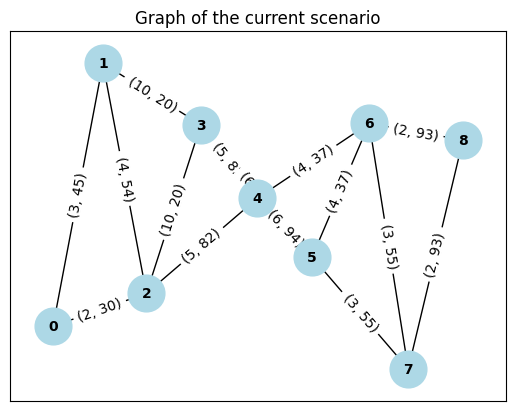

In [39]:
# Auto-reload modules for each new run
%reload_ext autoreload
# Imports 
import networkx as nx
import matplotlib.pyplot as plt
from instance_gen.graph import createGraphInstance

G = createGraphInstance(6,10,1,10,20,100,2)

# Position the nodes using a layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure()
nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')

# Prepare edge labels with both weights
edge_labels = {(u, v): f'({d["fuel_cost"]}, {d["time_cost"]})' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot with informative box
plt.title('Graph of the current scenario')
plt.show()